<a href="https://colab.research.google.com/github/GianFederico/MD-repo-Natural_Language_Processing/blob/main/NLP_lab2_processing_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import nltk
# nltk.download('popular')
# nltk.download('nps_chat')
# nltk.download('webtext')
# nltk.download('brown')

from nltk.book import *


### loading your own corpus ###
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/content/drive/MyDrive/ReadEra/Books/'
newcorpus = PlaintextCorpusReader(corpus_root, '.*')
### processing only one document ###
raw = open('/content/drive/MyDrive/ReadEra/Books/EpubGold-Clarke_Piranesi.epub.txt').read()
print (raw)



Susanna Clarke



Piranesi



traduzione di Donatella Rizzati





Per Colin





Io sono il grande studioso, il mago, l’adepto, che sta

compiendo l’esperimento. È ovvio che abbia

bisogno di cavie.

C.S. LEWIS, Il nipote del mago



La gente mi chiama filosofo o scienziato o antropologo.

Ma io non sono nessuna di queste cose. Sono

un anamnesiologo. Studio ciò che è stato dimenticato.

Scopro ciò che è completamente scomparso.

Lavoro con le assenze, con i silenzi, con le curiose

fratture fra le cose. In realtà sono un mago.

LAURENCE ARNE-SAYLES, intervista in

Il giardino segreto, maggio 1976





PARTE PRIMA

Piranesi





Quando la Luna è sorta nel Terzo Salone Settentrionale sono andato nel Nono Vestibolo

ANNOTAZIONE PER IL PRIMO GIORNO DEL QUINTO MESE DELL’ANNO IN CUI L’ALBATROS È ARRIVATO NEI SALONI SUD-OCCIDENTALI



Quando la Luna è sorta nel Terzo Salone Settentrionale sono andato nel Nono Vestibolo per assistere alla congiunzione di tre Maree. È un evento che accade sol

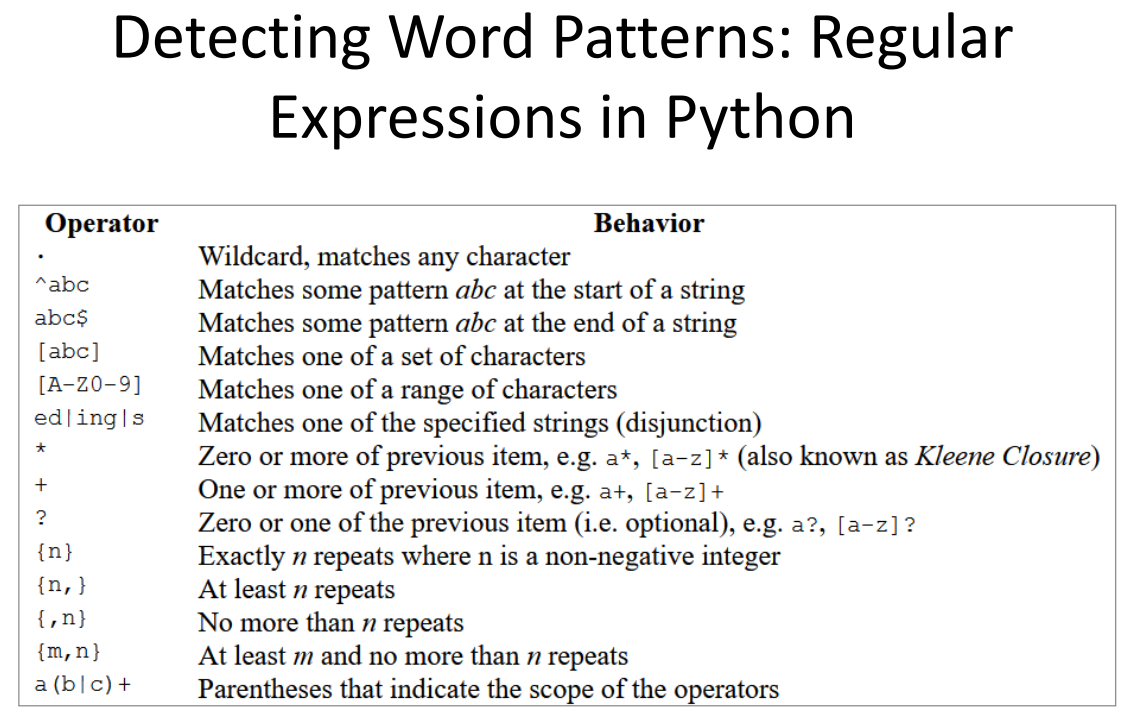


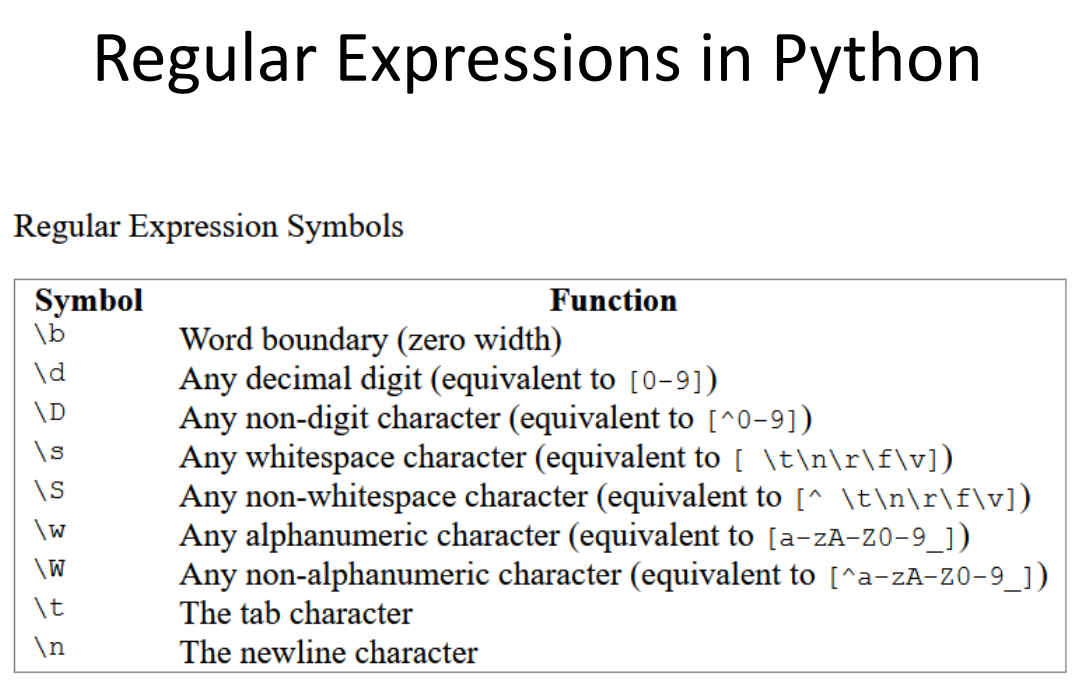

In [4]:
#Examples
import nltk
import re
print ("*** some examples of usage of the method re.search ***")
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]
matchedtokens1 = [w for w in wordlist if re.search('ssed$', w)] #words ending with ‘ed’
matchedtokens2 = [w for w in wordlist if re.search('^..j..t..$', w)] #8-letter word with j as its third letter and t as its sixth letter
matchedtokens3 = [w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)] #4-letter “4567” textonyms (type on old phones)
print (matchedtokens1)
print (matchedtokens2)
print (matchedtokens3)


print("_____________")
import nltk
import re
word = 'supercalifragilisticexpialidocious'
vowels=re.findall(r'[aeiou]', word)
print(vowels)
print(len(vowels))


print("_____________")
# only matched word
from nltk.corpus import gutenberg
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))
print (moby.findall(r"<a> (<.*>) <man>"))


print("_____________")
# three-word phrases ending with the word bro
from nltk.corpus import nps_chat
chat = nltk.Text(nps_chat.words())
seq2=chat.findall(r"<.*> <.*> <bro>")
print (seq2)


print("_____________")
# sequences of three or more words starting with the letter l [3]
#seq3=chat.findall(r"<l. {3,}*>")
#print (seq3)



print("_____________")
### finding expressions of the form x and other ys allows us to discover hypernyms
from nltk.corpus import brown
hobbies_learned = nltk.Text(brown.words(categories=['hobbies','learned']))
patterns=hobbies_learned.findall(r"<\w*> <and> <other> <\w*s>")
print (patterns)



*** some examples of usage of the method re.search ***
['abaissed', 'abscessed', 'adossed', 'appressed', 'assessed', 'blessed', 'bossed', 'classed', 'compressed', 'counterfessed', 'cressed', 'crossed', 'cuirassed', 'cussed', 'cypressed', 'depressed', 'distressed', 'dressed', 'embarrassed', 'encuirassed', 'engrossed', 'essed', 'expressed', 'foreimpressed', 'forepassed', 'forepossessed', 'fossed', 'glossed', 'grassed', 'instressed', 'jessed', 'mediodepressed', 'mispossessed', 'mossed', 'nondepressed', 'nonprofessed', 'nonsuppressed', 'obcompressed', 'oppressed', 'overblessed', 'possessed', 'prepossessed', 'professed', 'prowessed', 'repressed', 'semiappressed', 'semiundressed', 'subappressed', 'subcompressed', 'subdepressed', 'subimpressed', 'superblessed', 'suppressed', 'tressed', 'trussed', 'unaddressed', 'unamassed', 'unassessed', 'unblessed', 'unbossed', 'unburgessed', 'unbuttressed', 'uncanvassed', 'uncaressed', 'unclassed', 'uncompassed', 'uncompressed', 'unconfessed', 'uncrevassed'

In [5]:
# instances of the pattern as x as y
from nltk.corpus import brown
hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))
first_att=hobbies_learned.findall(r"<\w*> <as> <\w*>")
print (first_att)
second_att=hobbies_learned.findall(r"<[A-Z].*> <as> <\w*>")
print (second_att)


But as you; looks as though; seems as though; split as for; soon as
they; soon as an; just as they; graded as to; determine as accurately;
day as a; long as the; such as the; targets as well; such as economy;
such as these; such as the; regarded as symphonic; music as an;
sounded as sparkling; playing as it; distinction as a; approach as
distinctly; reading as a; and as a; me as finicky; vein as that;
disillusioning as the; such as the; engineering as such; intrudes as
a; reproduce as faithfully; sounds as though; from as far; west as
Wisconsin; and as far; south as Kentucky; introduced as the; do as
much; Juniors as the; chosen as International; Classes as well;
Contest as he; just as successful; Class as it; looking as neat;
Developed as a; clouds as they; question as to; it as simple; way as
an; same as for; way as boats; roads as existed; such as sailboats;
just as much; facilities as a; well as other; premises as well; such
as outboards; tappets as the; locks as you; edge as we; f

In [6]:
#RegEx for tokenization
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
... though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
... well without--Maybe it's always pepper that makes people hottempered,'..."""
tokens=raw.split()
print ("tokens - simple split:", tokens)

### same result with a regex
### splitting on any whitespace
tokens=re.split(r'\s+',raw)
print ("tokens - simple split:", tokens)

### with \W+ we match all characters other than letters, digits or underscore.
### We can use \W in a simple regular expression to split the input on anything other than a word character
re.split(r'\W+', raw)
print ("tokens - \W+ split:   ", tokens)

# matching the words instead of the spaces.
tokens=re.findall(r'\w+|\S\w*', raw) #match any sequence of word characters OR it will try to match any non-whitespace character followed by further word characters
print ("tokens - findall:     ", tokens)

text = 'That U.S.A. poster-print costs $12.40...'
pattern = r'''(?x) (?:[A-Z]\.)+ | \w+(?:-\w+)* | \$?\d+(?:\.\d+)?%? | \.\.\. | [][.,;"'?():-_`]'''
## abbreviations, e.g. U.S.A. | words with optional internal hyphens | currency and percentages, e.g. $12.40, 82% | ellipsis | these are separate tokens; includes ], [
tokens=nltk.regexp_tokenize(text, pattern)
print ("tokens - NLTK regex tokenizer:", tokens)


tokens - simple split: ["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', '...', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', '...', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hottempered,'..."]
tokens - simple split: ["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', '...', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', '...', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hottempered,'..."]
tokens - \W+ split:    ["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', '...', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', '...', 'well'

In [7]:
#Stemming
from nltk.tokenize import word_tokenize
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

raw = """DENNIS: Listen, strange women lying in ponds distributing swords is no basis for a system of government."""
tokens = word_tokenize(raw)
print ("Raw Text:", raw, "\n")
print ("TOKENS:", tokens)

porstems=[porter.stem(t) for t in tokens]
lanstems=[lancaster.stem(t) for t in tokens]

print ("Porter stems:", porstems)
print ("Lancaster stems:", lanstems)

#Lemmatization
print ("________________")
wnl = nltk.WordNetLemmatizer()
wnlemmas=[wnl.lemmatize(t) for t in tokens]
print ("WordNet Lemmas:", wnlemmas)
print ("Lemmatizing 'arguing' with WN lemmatizer->", wnl.lemmatize("arguing", pos=u'a'), ",",wnl.lemmatize("arguing", pos=u'v') )
print ("Lemmatizing 'lying' with WN lemmatizer->",wnl.lemmatize("lying", pos=u'v') )


Raw Text: DENNIS: Listen, strange women lying in ponds distributing swords is no basis for a system of government. 

TOKENS: ['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'lying', 'in', 'ponds', 'distributing', 'swords', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.']
Porter stems: ['denni', ':', 'listen', ',', 'strang', 'women', 'lie', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.']
Lancaster stems: ['den', ':', 'list', ',', 'strange', 'wom', 'lying', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'bas', 'for', 'a', 'system', 'of', 'govern', '.']
________________
WordNet Lemmas: ['DENNIS', ':', 'Listen', ',', 'strange', 'woman', 'lying', 'in', 'pond', 'distributing', 'sword', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.']
Lemmatizing 'arguing' with WN lemmatizer-> arguing , argue
Lemmatizing 'lying' with WN lemmatizer-> lie


In [8]:
#Sentence Segmentation
from nltk.corpus import brown
wordsxsent=len(nltk.corpus.brown.words()) / len(nltk.corpus.brown.sents())
print ("Avg. words per sentence: ", wordsxsent)
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents = nltk.sent_tokenize(text)
print ((sents[0:10]))

print ('____________')
silly = ['We', 'called', 'him', 'Tortoise', 'because', 'he', 'taught', 'us', '.']
print (' '.join(silly))
print (';'.join(silly))
print (''.join(silly))

print ('____________')
### formatted output
fdist = nltk.FreqDist(['dog', 'cat', 'dog', 'cat', 'dog', 'snake', 'dog', 'cat'])
for word in sorted(fdist):
  print('{}->{};'.format(word, fdist[word]), end=' ')

print ('\n____________')
### another example of formatted output
template = 'Lee wants a {} right now'
menu = ['sandwich', 'spam fritter', 'pancake']
for snack in menu:
  print(template.format(snack))

Avg. words per sentence:  20.250994070456922
['[The Man Who Was Thursday by G. K. Chesterton 1908]\n\nTo Edmund Clerihew Bentley\n\nA cloud was on the mind of men, and wailing went the weather,\nYea, a sick cloud upon the soul when we were boys together.', 'Science announced nonentity and art admired decay;\nThe world was old and ended: but you and I were gay;\nRound us in antic order their crippled vices came--\nLust that had lost its laughter, fear that had lost its shame.', 'Like the white lock of Whistler, that lit our aimless gloom,\nMen showed their own white feather as proudly as a plume.', 'Life was a fly that faded, and death a drone that stung;\nThe world was very old indeed when you and I were young.', 'They twisted even decent sin to shapes not to be named:\nMen were ashamed of honour; but we were not ashamed.', 'Weak if we were and foolish, not thus we failed, not thus;\nWhen that black Baal blocked the heavens he had no hymns from us\nChildren we were--our forts of sand w

In [9]:
### output on a file ###
output_file = open('provaoutput.txt', 'w')
words = set(nltk.corpus.genesis.words('english-kjv.txt'))
for word in sorted(words):
  print(word, file=output_file)
